In [430]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import missingno as msno

In [ ]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

<Axes: >

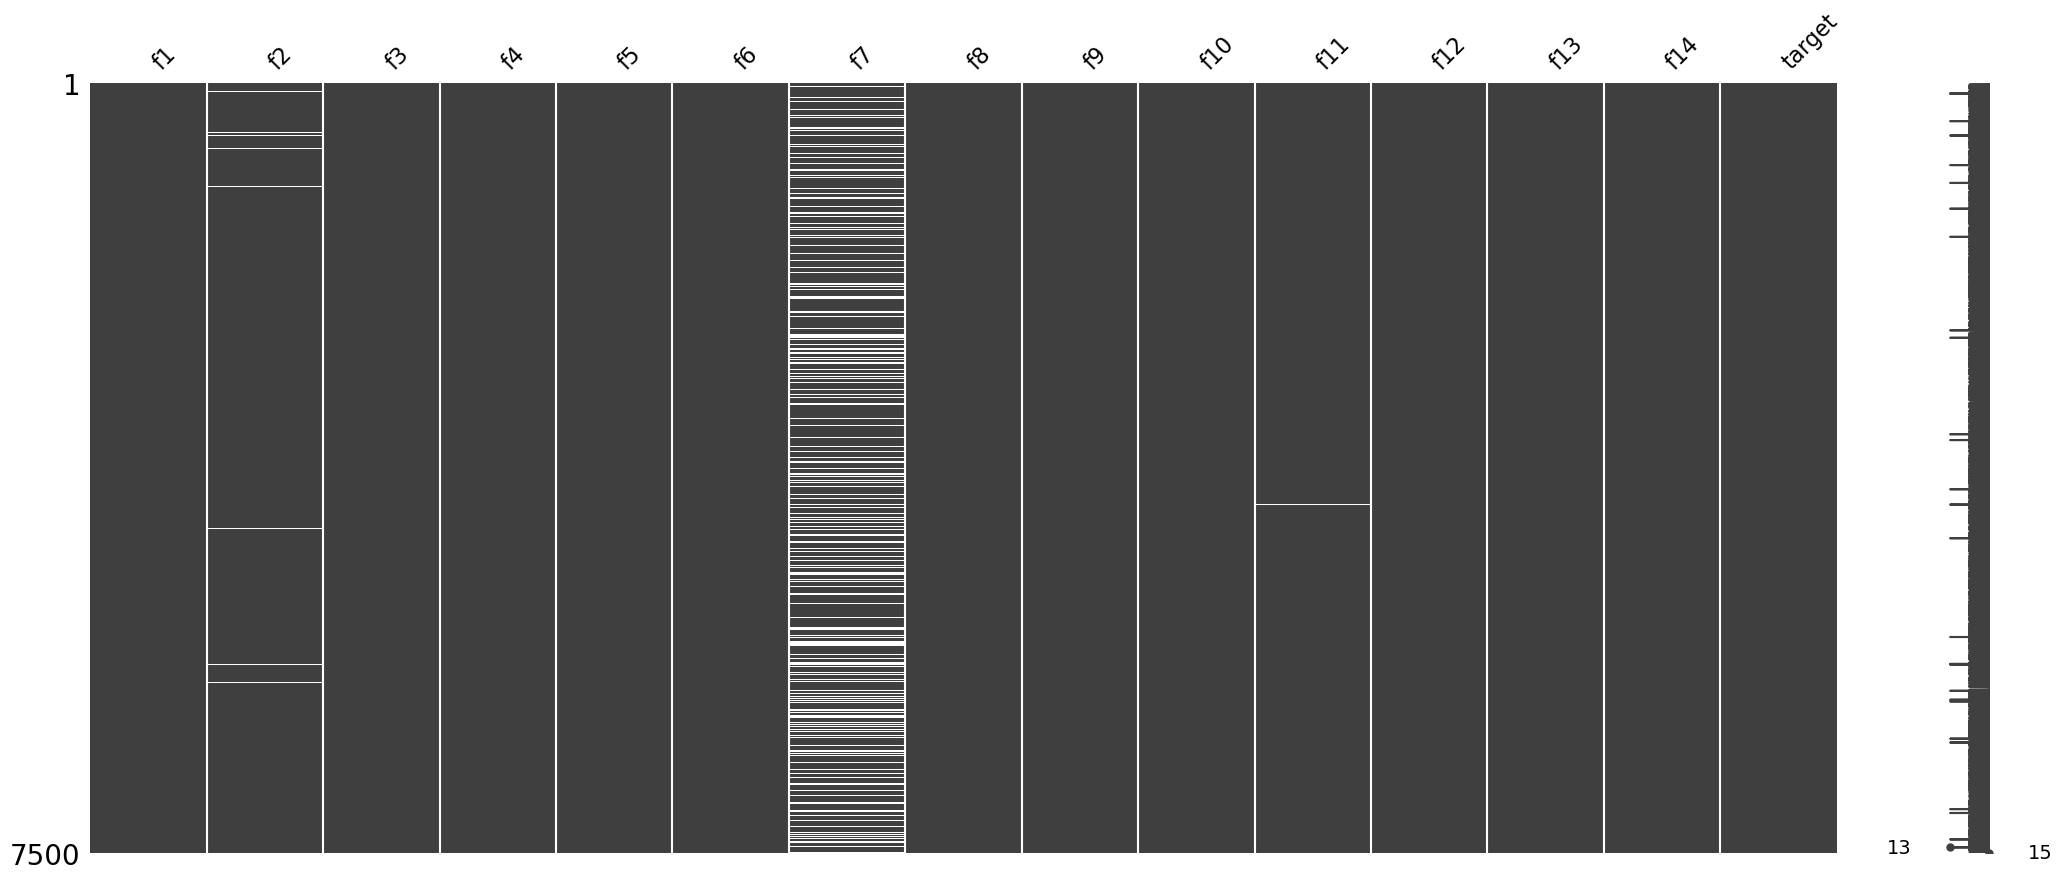

In [431]:
msno.matrix(Xtrain)

In [432]:
Xtrain.f1.value_counts()

f1
31    221
33    210
35    208
23    207
34    205
     ... 
84      3
79      3
82      2
83      2
85      1
Name: count, Length: 70, dtype: int64

In [433]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [434]:
print('Процент заполненных данных Xtrain:',round(len(Xtrain.dropna())/len(Xtrain)*100,2))

Процент заполненных данных Xtrain: 74.23


In [435]:
print('Процент заполненных данных Xtrain:',round((Xtrain.isna().sum()/len(Xtrain))*100,2))

Процент заполненных данных Xtrain: f1         0.00
f2         1.00
f3         0.00
f4         0.00
f5         0.00
f6         0.00
f7        25.00
f8         0.00
f9         0.00
f10        0.00
f11        0.13
f12        0.00
f13        0.00
f14        0.00
target     0.00
dtype: float64


<Axes: >

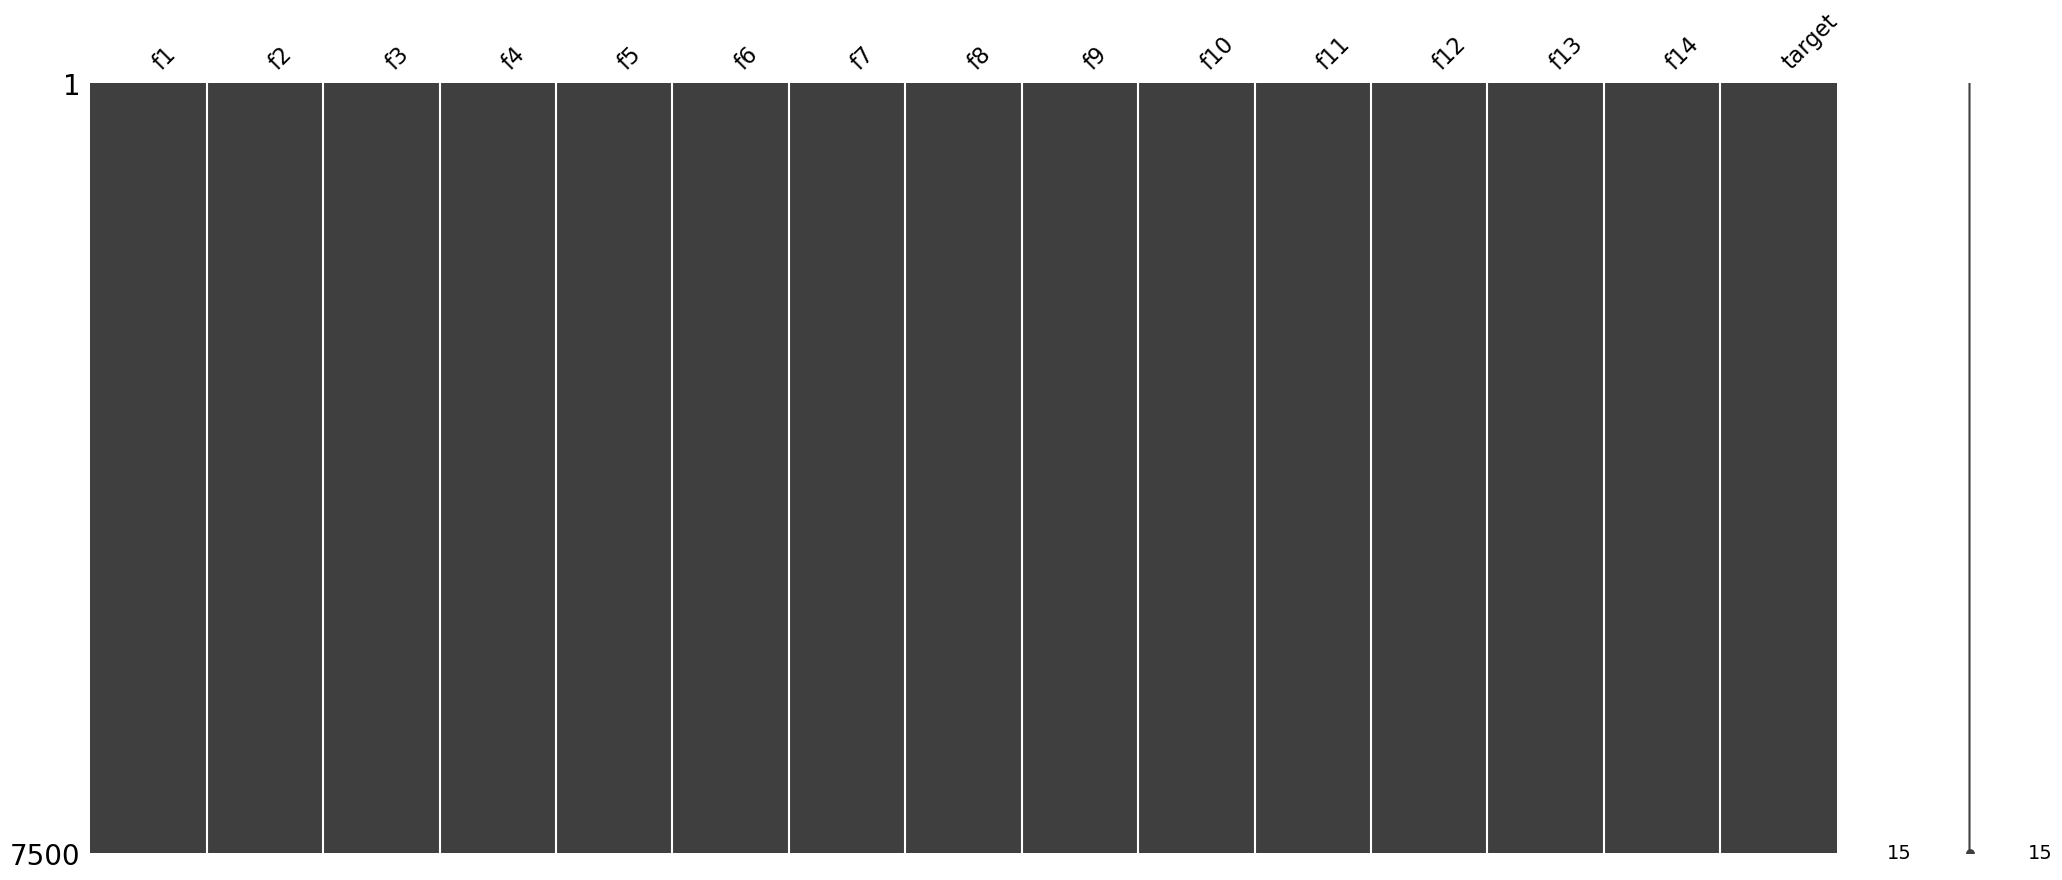

In [436]:
Xtrain = Xtrain.apply(lambda x: x.fillna(x.median()))
msno.matrix(Xtrain)

In [437]:
print('Процент заполненных данных Xtrain:',round((Xtrain.isna().sum()/len(Xtrain))*100,2))

Процент заполненных данных Xtrain: f1        0.0
f2        0.0
f3        0.0
f4        0.0
f5        0.0
f6        0.0
f7        0.0
f8        0.0
f9        0.0
f10       0.0
f11       0.0
f12       0.0
f13       0.0
f14       0.0
target    0.0
dtype: float64


In [438]:
print('Процент заполненных данных Xtrain:',round(len(Xtrain.dropna())/len(Xtrain)*100,2))

Процент заполненных данных Xtrain: 100.0


In [439]:
print('Процент заполненных данных Xtest:\n',round((Xtest.isna().sum()/len(Xtest))*100,2))

Процент заполненных данных Xtest:
 f1        0.0
f2        0.0
f3        0.0
f4        0.0
f5        0.0
f6        0.0
f7        0.0
f8        0.0
f9        0.0
f10       0.0
f11       0.0
f12       0.0
f13       0.0
f14       0.0
target    0.0
dtype: float64


In [440]:
print('Процент заполненных данных Xtest:\n',round(len(Xtest.dropna())/len(Xtest)*100,2))

Процент заполненных данных Xtest:
 100.0


In [441]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.702194,1.903850e+05,0.238933,10.083200,0.238934,0.240810,0.238933,23.893333,0.238933,1067.269067,88.974933,40.670800,0.238955,0.238933
std,13.647719,75.843216,1.058674e+05,0.151738,2.546071,0.190283,0.127625,0.193365,4.451530,0.087708,7425.491311,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.131370,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [442]:
len(Xtrain.f11[Xtrain.f11!=0])/len(Xtrain.f11)

0.08026666666666667

<Axes: >

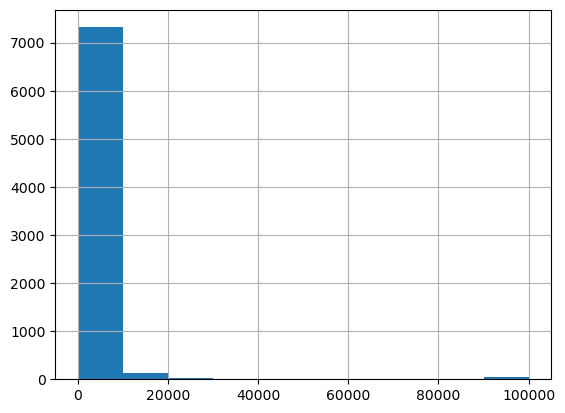

In [443]:
Xtrain.f11.hist()

In [444]:
Xtrain.f12.value_counts()

f12
0       7142
1902      54
1977      46
1887      29
1672      15
        ... 
1726       1
2824       1
1594       1
2547       1
1138       1
Name: count, Length: 69, dtype: int64

In [445]:
len(Xtrain.f12[Xtrain.f12!=0])/len(Xtrain.f12)

0.047733333333333336

In [446]:
Xtrain = Xtrain.drop('f7',axis=1)
Xtrain

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [447]:
Xtest = Xtest.drop('f7',axis=1)

In [448]:
col = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14']
col

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14']

In [449]:
std_scaler = StandardScaler()
data_mm_scaler =Xtrain.drop('target', axis=1)
data_mm_scaler.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14'],
      dtype='object')

In [450]:
std_scaler = StandardScaler()
data_mm_scaler =Xtrain.drop('target', axis=1)
std_scaler.fit(data_mm_scaler[data_mm_scaler.columns])
std_scaled = std_scaler.transform(data_mm_scaler[data_mm_scaler.columns])
new_col = [col+'_std' for col in data_mm_scaler]
Xtrain[new_col] = std_scaled
Xtrain.drop(col,axis=1,inplace=True)
Xtrain.head()

,target,f1_std,f2_std,f3_std,f4_std,f5_std,f6_std,f8_std,f9_std,f10_std,f11_std,f12_std,f13_std,f14_std
0,0,0.836855,-0.265147,0.785478,-0.885520,-2.389410,1.083156,1.062310,-4.026566,0.699695,-0.14374,-0.219968,0.675565,-3.333691
1,0,-0.482135,0.501974,-0.161259,-0.093917,0.360108,1.083156,1.062310,-4.026566,0.699695,-0.14374,-0.219968,1.567754,0.131064
2,0,-0.042471,-0.265147,-1.525575,-1.360608,-1.211045,1.083156,1.062310,0.384924,0.699695,-0.14374,-0.219968,0.756673,0.131064
3,0,-1.434738,-0.265147,2.243304,-0.392880,-0.032680,-0.997564,-1.186611,0.384924,0.699695,-0.14374,-0.219968,-0.459948,0.131064
4,0,0.397192,-0.265147,-0.765593,-1.360608,-1.211045,-0.736303,-0.891387,-4.026566,-1.429194,-0.14374,-0.219968,0.432241,-1.290000


In [451]:
data_mm_scaler =Xtest.drop('target', axis=1)
std_scaler.fit(data_mm_scaler[data_mm_scaler.columns])
std_scaled = std_scaler.transform(data_mm_scaler[data_mm_scaler.columns])
new_col = [col+'_std' for col in data_mm_scaler]
Xtest[new_col] = std_scaled
Xtest.drop(col,axis=1,inplace=True)
Xtest.head()

,target,f1_std,f2_std,f3_std,f4_std,f5_std,f6_std,f8_std,f9_std,f10_std,f11_std,f12_std,f13_std,f14_std
0,0,-0.526003,-8.526513e-14,-1.341742,5.551115e-17,-0.022236,5.551115e-17,5.551115e-17,3.552714e-15,5.551115e-17,-0.150713,4.272556,-1.660856,5.551115e-17
1,0,-1.046856,-8.526513e-14,-1.473884,5.551115e-17,-1.196697,5.551115e-17,5.551115e-17,3.552714e-15,5.551115e-17,-0.150713,-0.216075,-0.008986,5.551115e-17
2,0,-1.493302,-8.526513e-14,0.853606,5.551115e-17,-1.196697,5.551115e-17,5.551115e-17,3.552714e-15,5.551115e-17,-0.150713,-0.216075,-1.660856,5.551115e-17
3,0,-1.418894,-8.526513e-14,1.880103,5.551115e-17,-0.413723,5.551115e-17,5.551115e-17,3.552714e-15,5.551115e-17,-0.150713,-0.216075,-1.660856,5.551115e-17
4,0,-0.749225,-8.526513e-14,0.083273,5.551115e-17,-0.022236,5.551115e-17,5.551115e-17,3.552714e-15,5.551115e-17,-0.150713,-0.216075,-0.008986,5.551115e-17


In [452]:
Xtrain.target.value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

In [453]:
Xtrain.head()

,target,f1_std,f2_std,f3_std,f4_std,f5_std,f6_std,f8_std,f9_std,f10_std,f11_std,f12_std,f13_std,f14_std
0,0,0.836855,-0.265147,0.785478,-0.885520,-2.389410,1.083156,1.062310,-4.026566,0.699695,-0.14374,-0.219968,0.675565,-3.333691
1,0,-0.482135,0.501974,-0.161259,-0.093917,0.360108,1.083156,1.062310,-4.026566,0.699695,-0.14374,-0.219968,1.567754,0.131064
2,0,-0.042471,-0.265147,-1.525575,-1.360608,-1.211045,1.083156,1.062310,0.384924,0.699695,-0.14374,-0.219968,0.756673,0.131064
3,0,-1.434738,-0.265147,2.243304,-0.392880,-0.032680,-0.997564,-1.186611,0.384924,0.699695,-0.14374,-0.219968,-0.459948,0.131064
4,0,0.397192,-0.265147,-0.765593,-1.360608,-1.211045,-0.736303,-0.891387,-4.026566,-1.429194,-0.14374,-0.219968,0.432241,-1.290000


In [454]:
Xtest.target.value_counts()

target
0    1913
1     587
Name: count, dtype: int64

<Axes: >

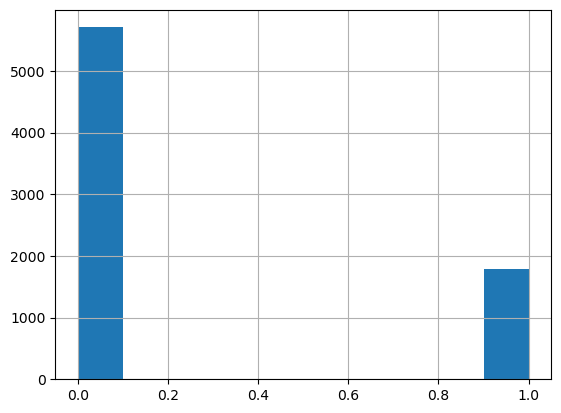

In [455]:
Xtrain.target.hist()

In [457]:
x = Xtrain.drop('target', axis=1)
y = Xtrain['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

models = [KNeighborsClassifier(), LogisticRegression(), SVC()]

for model in models:
    model.fit(x_train, y_train)
    predict_test = model.predict(x_test)
    print(f'{model} {f1_score(y_test, predict_test)}')

KNeighborsClassifier() 0.6040268456375839
LogisticRegression() 0.6097560975609756
SVC() 0.62148070907195


In [469]:
knn = KNeighborsClassifier()

param_grid = { 'n_neighbors' : np.arange(1,50,2),
    'algorithm' : ['ball_tree','kd_tree','brute'],
    'weights': ['uniform','distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
neighbors = best_params.get('n_neighbors')
algorithm = best_params.get('algorithm')
weights = best_params.get('weights')

knn_model = KNeighborsClassifier(n_neighbors=neighbors,algorithm= algorithm,weights=weights)
knn_model.fit(x_train, y_train)
knn_predict_test = knn_model.predict(x_test)

print(f'F1: {f1_score(y_test, knn_predict_test)}')

F1: 0.6006066734074823


In [470]:
log = LogisticRegression()
param_grid2 = {
    'C' : np.logspace(-1,0.5,50),
    'penalty' : ['l1','l2'],
    'class_weight' : ['balanced']
}
grid_search2 = GridSearchCV(log, param_grid2, cv=5)
grid_search2.fit(x_train, y_train)

best_params2 = grid_search2.best_params_
C = best_params2.get('C')
penalty = best_params2.get('penalty')
class_weight = best_params2.get('class_weight')

log_model = LogisticRegression(C=C, class_weight=class_weight, penalty = penalty)
log_model.fit(x_train, y_train)
log_predict_test = log_model.predict(x_test)
print(f'F1: {f1_score(y_test, log_predict_test)}')

F1: 0.667131891137474


c:\Users\79292\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\79292\anaconda3\Lib\site-packages\sklearn\linear_model\

In [471]:
svc = SVC()
param_grid3 = {
    'class_weight' : ['balanced'] ,
    'kernel' : ['linear','poly','rbf','sigmoid']
}
grid_search3 = GridSearchCV(svc, param_grid3, cv=5)
grid_search3.fit(x_train, y_train)
best_params3 = grid_search3.best_params_
kernel = best_params3.get('kernel')
class_weight = best_params3.get('class_weight')

svc_model = SVC(kernel=kernel, class_weight=class_weight)
svc_model.fit(x_train, y_train)
svc_predict_test = svc_model.predict(x_test)
print(f'F1: {f1_score(y_test, svc_predict_test)}')

F1: 0.6662225183211192


In [475]:
X_test = Xtest.drop(columns=['target'], axis=1)
Y_test = Xtest['target']

svc_predict = log_model.predict(X_test)
print(f'F1: {f1_score(Y_test, svc_predict)}')

F1: 0.5071574642126788


In [476]:
alpha_values = np.arange(0, 1, 0.01)

pred1 = svc_model.fit(x_test, y_test)
pred2 = log_model.fit(x_test, y_test)

min_error = 0
best_alpha = -1
for alpha in alpha_values:
    pred_final = alpha * pred1.predict(X_test) + (1 - alpha) * pred2.predict(X_test)
    error = mean_squared_error(Y_test, pred_final)
    if error < min_error:
        min_error = error
        best_alpha = alpha

pred_final = best_alpha * pred1.predict(X_test) + (1 - best_alpha) * pred2.predict(X_test)

In [477]:
mean_squared_error(Y_test, pred_final)

0.3184